In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [4]:
Fs = 1000.0;            # Sampling frequency                    
T = 1/Fs;             # Sampling period       
L = 1500;             # Length of signal
t = np.arange(0, L-1) * T;        # Time vector

In [5]:
S = 0.7*np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

In [6]:
X = S + 2*np.random.randn(t.size)

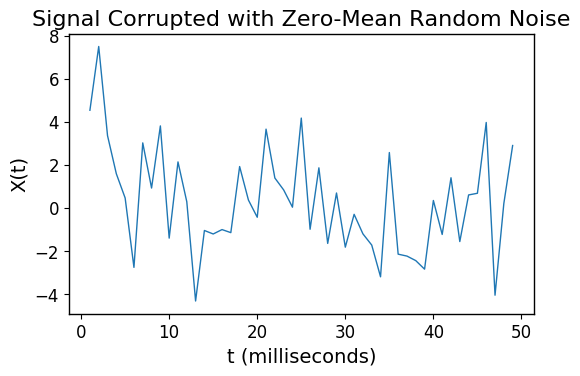

In [9]:
plt.plot(1000*t[1:50],X[1:50])
plt.title('Signal Corrupted with Zero-Mean Random Noise')
plt.xlabel('t (milliseconds)')
plt.ylabel('X(t)')

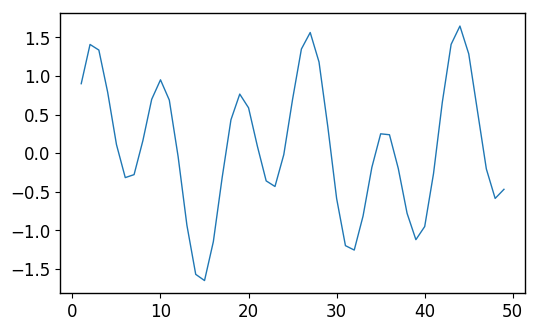

In [16]:
plt.plot(1000 * t[1:50], S[1:50])

In [10]:
Y = np.fft.fft(X)

In [11]:
P2 = abs(Y/L)
P1 = P2[1:L/2+1]
P1[2:-1] = 2*P1[2:-1]

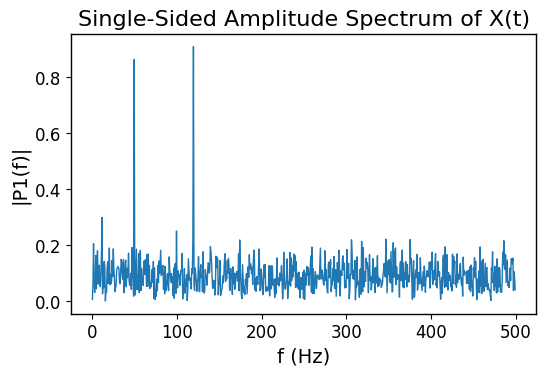

In [12]:
f = Fs*np.arange(0,(L/2))/L;
plt.plot(f,P1)
plt.title('Single-Sided Amplitude Spectrum of X(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')

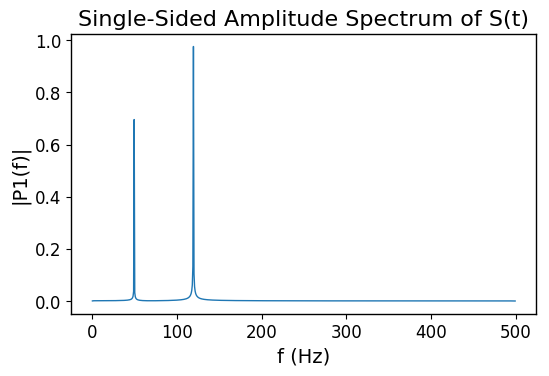

In [13]:
Y = np.fft.fft(S)
P2 = abs(Y/L)
P1 = P2[1:L/2+1]
P1[2:-1] = 2*P1[2:-1];

plt.plot(f,P1) 
plt.title('Single-Sided Amplitude Spectrum of S(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')